In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("http://51.91.120.89/extras/advertising.csv", usecols=["TV","sales"])
df

,TV,sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [5]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [4]:
X = df.TV.values.reshape(-1,1)
y = df.sales

In [21]:
model = DecisionTreeRegressor(max_depth=5, random_state=0)
model.fit(X, y)

DecisionTreeRegressor(max_depth=5, random_state=0)

0.7240301605165133


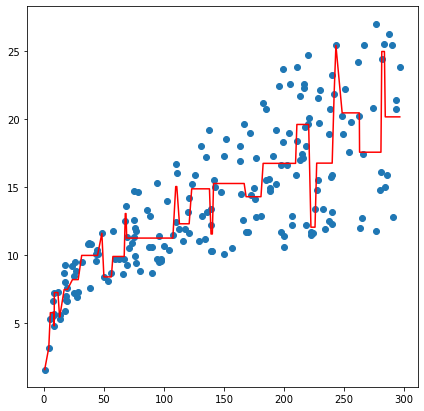

In [22]:
plt.figure(figsize=(7,7))
plt.scatter(X, y)

x = np.unique(X).reshape(-1,1)
y_pred = model.predict(x)

plt.plot(x, y_pred, c="r")

print( r2_score(y, model.predict(X) ) )

## Predykcje cen z otomoto.pl

In [23]:
df = pd.read_csv("http://51.91.120.89/extras/otomoto-dt.csv")
df

,Unnamed: 0,ID,Cena,Rocznik,Przebieg,Paliwo,Marka pojazdu,Model pojazdu,Wersja,Kategoria,...,Kolor,Perłowy,Zarejestrowany w Polsce,Bezwypadkowy,Serwisowany w ASO,Pierwszy właściciel,Metalik,Możliwość finansowania,Pojemnosc,Wyposażenie
0,0,6069409698,19500,2008,265340.0,Diesel,Volkswagen,Passat,B6 (2005-2010),Osobowe,...,Inny kolor,0,1,1,0,0,0,0,1896.0,ABS|ELEKTRYCZNE SZYBY PRZEDNIE|PODUSZKA POWIET...
1,1,6069322818,32000,2011,205000.0,Diesel,Volkswagen,Passat,B7 (2010-2014),Osobowe,...,Brązowy,0,1,1,0,0,1,0,1600.0,ABS|ELEKTRYCZNE SZYBY PRZEDNIE|PODUSZKA POWIET...
2,2,6069409878,11500,2008,373000.0,Diesel,Volkswagen,Passat,B6 (2005-2010),Osobowe,...,Niebieski,0,1,1,0,0,1,0,1968.0,ABS|ELEKTRYCZNE SZYBY PRZEDNIE|PODUSZKA POWIET...
3,3,6068447707,69800,2017,104000.0,Diesel,Volkswagen,Passat,B8 (2014-),Osobowe,...,Czarny,0,0,1,1,1,1,1,1998.0,ABS|ELEKTRYCZNE SZYBY PRZEDNIE|PODUSZKA POWIET...
4,4,6069140421,41900,2014,198000.0,Diesel,Volkswagen,Passat,B7 (2010-2014),Osobowe,...,Inny kolor,0,1,1,1,0,1,0,1968.0,ABS|ELEKTRYCZNE SZYBY PRZEDNIE|PODUSZKA POWIET...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2745,2962,6056325814,29900,2012,180000.0,Diesel,Volkswagen,Passat,B7 (2010-2014),Osobowe,...,Srebrny,0,0,1,1,0,0,0,1600.0,ABS|ELEKTRYCZNE SZYBY PRZEDNIE|PODUSZKA POWIET...
2746,2963,6064437586,35600,2011,230000.0,Diesel,Volkswagen,Passat,B7 (2010-2014),Osobowe,...,Beżowy,0,1,1,0,0,1,0,2000.0,ABS|ELEKTRYCZNE SZYBY PRZEDNIE|PODUSZKA POWIET...
2747,2964,6067342081,83900,2016,113000.0,Diesel,Volkswagen,Passat,B8 (2014-),Osobowe,...,Czarny,0,1,1,1,1,1,1,1968.0,ABS|ELEKTRYCZNE SZYBY PRZEDNIE|PODUSZKA POWIET...
2748,2965,6069411917,69999,2015,153000.0,Diesel,Volkswagen,Passat,B8 (2014-),Osobowe,...,Biały,0,0,1,1,0,0,0,2000.0,ABS|ELEKTRYCZNIE USTAWIANE LUSTERKA|PODUSZKA P...


In [26]:
df_B8 = df[df.Wersja.str.startswith("B8")]
df_B8.head(3)

,Unnamed: 0,ID,Cena,Rocznik,Przebieg,Paliwo,Marka pojazdu,Model pojazdu,Wersja,Kategoria,...,Kolor,Perłowy,Zarejestrowany w Polsce,Bezwypadkowy,Serwisowany w ASO,Pierwszy właściciel,Metalik,Możliwość finansowania,Pojemnosc,Wyposażenie
3,3,6068447707,69800,2017,104000.0,Diesel,Volkswagen,Passat,B8 (2014-),Osobowe,...,Czarny,0,0,1,1,1,1,1,1998.0,ABS|ELEKTRYCZNE SZYBY PRZEDNIE|PODUSZKA POWIET...
6,6,6066257823,115900,2019,1.0,Benzyna,Volkswagen,Passat,B8 (2014-),Osobowe,...,Brązowy,0,0,1,0,0,1,1,1500.0,ABS|ELEKTRYCZNE SZYBY PRZEDNIE|PODUSZKA POWIET...
7,7,6069321886,89790,2016,89000.0,Diesel,Volkswagen,Passat,B8 (2014-),Osobowe,...,Brązowy,0,1,1,1,1,1,0,1995.0,ABS|ELEKTRYCZNE SZYBY PRZEDNIE|PODUSZKA POWIET...


In [27]:
df.columns

Index(['Unnamed: 0', 'ID', 'Cena', 'Rocznik', 'Przebieg', 'Paliwo',
       'Marka pojazdu', 'Model pojazdu', 'Wersja', 'Kategoria', 'Moc',
       'Skrzynia biegów', 'Typ', 'Kolor', 'Perłowy', 'Zarejestrowany w Polsce',
       'Bezwypadkowy', 'Serwisowany w ASO', 'Pierwszy właściciel', 'Metalik',
       'Możliwość finansowania', 'Pojemnosc', 'Wyposażenie'],
      dtype='object')

In [28]:
df_B8.drop(columns=['Unnamed: 0', 'ID', 'Marka pojazdu', 'Model pojazdu', 'Wersja',  'Wyposażenie', 'Kategoria' ], inplace=True )

C:\Users\kurs\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [29]:
df_B8.tail(2)

,Cena,Rocznik,Przebieg,Paliwo,Moc,Skrzynia biegów,Typ,Kolor,Perłowy,Zarejestrowany w Polsce,Bezwypadkowy,Serwisowany w ASO,Pierwszy właściciel,Metalik,Możliwość finansowania,Pojemnosc
2748,69999,2015,153000.0,Diesel,150.0,"Automatyczna dwusprzęgłowa (DCT, DSG)",Kombi,Biały,0,0,1,1,0,0,0,2000.0
2749,58999,2015,186000.0,Diesel,150.0,Manualna,Kombi,Szary,0,0,1,1,0,1,1,2000.0


In [30]:
df_B8.Kolor.unique()

array(['Czarny', 'Brązowy', 'Niebieski', 'Złoty', 'Szary', 'Srebrny',
       'Inny kolor', 'Biały', 'Czerwony', 'Beżowy', 'Bordowy', 'Zielony'],
      dtype=object)

In [31]:
df_B8.Kolor.value_counts()

Czarny        440
Szary         290
Srebrny       251
Biały         175
Niebieski     128
Brązowy        92
Inny kolor     68
Złoty          36
Bordowy        11
Beżowy         10
Czerwony        3
Zielony         1
Name: Kolor, dtype: int64

In [33]:
df_B8 = pd.get_dummies(df_B8)

In [34]:
df_B8.dtypes

Cena                                                       int64
Rocznik                                                    int64
Przebieg                                                 float64
Moc                                                      float64
Perłowy                                                    int64
Zarejestrowany w Polsce                                    int64
Bezwypadkowy                                               int64
Serwisowany w ASO                                          int64
Pierwszy właściciel                                        int64
Metalik                                                    int64
Możliwość finansowania                                     int64
Pojemnosc                                                float64
Paliwo_Benzyna                                             uint8
Paliwo_Diesel                                              uint8
Skrzynia biegów_Automatyczna bezstopniowa (CVT)            uint8
Skrzynia biegów_Automatyc

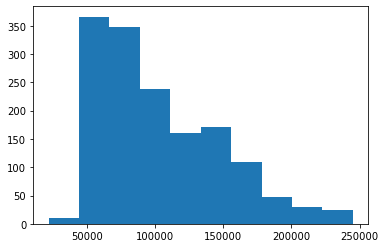

In [36]:
plt.hist(df_B8.Cena)
plt.show()

In [37]:
X = df_B8.iloc[:, 1:]
y = df_B8.Cena

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [40]:
for i in range(2,21):
    model = DecisionTreeRegressor(max_depth=i, random_state=0)
    model.fit(X_train, y_train)
    print(f"DT={i}, score={model.score(X_test,y_test)}")

DT=2, score=0.7767253005136003
DT=3, score=0.8420342780495613
DT=4, score=0.9074729630505121
DT=5, score=0.9104847906461176
DT=6, score=0.9242689890933495
DT=7, score=0.9101440314623305
DT=8, score=0.8864763280039045
DT=9, score=0.8987052015155764
DT=10, score=0.8867035746420222
DT=11, score=0.8801653939189065
DT=12, score=0.8878866815644589
DT=13, score=0.8868243497335954
DT=14, score=0.8845816404411624
DT=15, score=0.8844520644759963
DT=16, score=0.8843000496548602
DT=17, score=0.8830413181643071
DT=18, score=0.8859385502649122
DT=19, score=0.8847535717116549
DT=20, score=0.8794308387752285


In [41]:
i=6
model = DecisionTreeRegressor(max_depth=i, random_state=0)
model.fit(X_train, y_train)
print(f"DT={i}, score={model.score(X_test,y_test)}")

DT=6, score=0.9242689890933495


In [44]:
pd.DataFrame( model.feature_importances_ , X.columns).sort_values(0, ascending=False).head(7)

,0
Przebieg,0.776376
Moc,0.154152
Rocznik,0.030467
Skrzynia biegów_Manualna,0.010702
Paliwo_Diesel,0.010271
"Skrzynia biegów_Automatyczna dwusprzęgłowa (DCT, DSG)",0.004478
Pojemnosc,0.003446


In [45]:
df.Paliwo.value_counts()

Diesel         1964
Benzyna         777
Benzyna+LPG       5
Benzyna+CNG       4
Name: Paliwo, dtype: int64